Linear regression

In [32]:
import numpy as np

def load_lists(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    for line in sourceInLine:
        temp = line.strip()[1:].strip(']').split(',')
        temp = [int(x) for x in temp]
        data.append(temp)
    f.close()
    return data

def load_numbers(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    for line in sourceInLine:
        temp=float(line)
        data.append(temp)
    f.close()
    return data
A = load_lists('/rshome/hanwei.fan/WorkSpace/FNN_DSE_28/traverse_logs/full/archi.txt')
y = load_numbers('/rshome/hanwei.fan/WorkSpace/FNN_DSE_28/traverse_logs/full/area.txt')
# Am = np.mat(A)
# ym = np.mat(y).T

In [2]:
def area_component(idx, params):
    total=[]
    for p in params:
        temp=[]
        for i,n in enumerate(A):
            if n[idx]==p: 
                temp.append(i)
        total.append(temp)
    sums=[]
    for l in total:
        sums.append(sum([y[x] for x in l]))
    subs=[]
    for i in range(len(sums)-1):
        subs.append((sums[i+1]-sums[i])/(33750/len(sums))/(params[i+1]-params[i]))
    print(subs)
    print(min(subs), ',', max(subs))

In [3]:
area_component(1,[1,2,4,8,16])

[0.08151147555567419, 0.08233183777776139, 0.23537380555551984, 0.2398497566666758]
0.08151147555567419 , 0.2398497566666758


In [4]:
area_component(2,[256,512,1024,2048,4096])

[0.0024192237557873527, 0.0025399570862267534, 0.002465030104166716, 0.0029472806640624257]
0.0024192237557873527 , 0.0029472806640624257


In [5]:
area_component(3,[1,2,4,8,16])

[0.620339835555616, 0.5482376503703756, 0.7527440948148227, 0.7789060474073938]
0.5482376503703756 , 0.7789060474073938


In [6]:
area_component(4,[4,5,6])

[0.23960794755545084, 0.2786094755554572]
0.23960794755545084 , 0.2786094755554572


In [7]:
area_component(5,[2,4,8])

[-0.00010620933333347138, 0.00011295266666663035]
-0.00010620933333347138 , 0.00011295266666663035


In [8]:
area_component(6,[2, 4])

[3.493481481499556e-05]
3.493481481499556e-05 , 3.493481481499556e-05


In [9]:
area_component(7,[32, 64, 96, 128, 130])

[0.0016503473148123805, 0.0015124478703706296, 0.0015232417592543008, 0.0011381622222952838]
0.0011381622222952838 , 0.0016503473148123805


In [10]:
bounds=(
    (0.0033247530833351953, 0.0036588981666715375), 
    (0.08151147555567419, 0.2398497566666758),
    (0.0024192237557873527,0.0029472806640624257),
    (0.5482376503703756, 0.7789060474073938),
    (0.23960794755545084, 0.2786094755554572),
    (0.0001 ,  0.00011295266666663035),
    (3.493481481499555e-05 ,  3.493481481499556e-05),
    (0.0011381622222952838 ,  0.0016503473148123805),
    (0.10,0.12),
    (0.26,0.28),
    (0.33,0.49)
    )

In [11]:
lb=[x[0] for x in bounds]
ub=[x[1] for x in bounds]
# lb=tuple(lb.append(-np.inf))
# ub=tuple(ub.append(np.inf))
lb.append(-np.inf)
ub.append(np.inf)
lb=tuple(lb)
ub=tuple(ub)

In [17]:
from scipy.optimize import lsq_linear
x=lsq_linear(A, y, bounds=(lb,ub))

In [28]:
x

 active_mask: array([ 0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0])
        cost: 235065.5204913763
         fun: array([ -3.56660296,  -3.55426815,  -3.53921334, ..., -12.67101272,
       -12.68642791, -12.68523511])
     message: 'The relative change of the cost function is less than `tol`.'
         nit: 8
  optimality: 1.063208079774651e-08
      status: 2
     success: True
           x: array([ 3.42522271e-03,  2.13071929e-01,  2.72723973e-03,  7.35940210e-01,
        2.59108712e-01,  1.00000000e-04,  3.49348148e-05,  1.54640025e-03,
        1.12582433e-01,  2.72003123e-01,  4.44466353e-01, -2.68389346e+00])

In [22]:
yy=np.dot(A, x.x)

In [31]:
sum((y-yy)**2)/2

235065.52049137373

MLP version

In [2]:
import numpy as np

def load_lists(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    for line in sourceInLine:
        temp = line.strip()[1:].strip(']').split(',')
        temp = [int(x) for x in temp]
        data.append(temp)
    f.close()
    return data

def load_numbers(txtfile):
    f=open(txtfile,'r')
    sourceInLine=f.readlines()
    data=[]
    for line in sourceInLine:
        temp=float(line)
        data.append(temp)
    f.close()
    return data
A = load_lists('/rshome/hanwei.fan/WorkSpace/FNN_DSE_28/traverse_logs/full/archi.txt')
y = load_numbers('/rshome/hanwei.fan/WorkSpace/FNN_DSE_28/traverse_logs/full/area.txt')
import torch
A_ = torch.Tensor(A).cuda()
y_ = torch.Tensor(y).cuda()

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):

    def __init__(self, A):
        super(MLP, self).__init__()

        self.state_space = len(A[0])

        self.fc1 = nn.Linear(self.state_space, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        # x = F.dropout(x, 0.5)
        return x

/rshome/hanwei.fan/anaconda3/envs/py37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
# 线性拟合相当于一个神经元，将拟合结果代入神经元参数可得到一样的效果
net = MLP(A).cuda()
net.fc1.weight = torch.nn.Parameter(torch.tensor([[ 3.42522271e-03,  2.13071929e-01,  2.72723973e-03,  7.35940210e-01,
        2.59108712e-01,  1.00000000e-04,  3.49348148e-05,  1.54640025e-03,
        1.12582433e-01,  2.72003123e-01,  4.44466353e-01]], requires_grad=True).cuda())
net.fc1.bias = torch.nn.Parameter(torch.tensor(-2.68389346, requires_grad=True).cuda())

out_test = net.fc1(A_)
cost_test = 0.5*torch.sum((y_-out_test.T)**2)
print(cost_test)
avg_err = torch.mean(torch.abs(y_ - out_test.T[0])/y_)
print(avg_err)

tensor(235065.5312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.3012, device='cuda:0', grad_fn=<MeanBackward0>)


In [3]:
import audtorch
from audtorch.metrics.functional import pearsonr
pearsonr(y_, out_test.T[0])

NameError: name 'out_test' is not defined

In [3]:
pthfile = '/rshome/hanwei.fan/WorkSpace/FNN_DSE_28/traverse_logs/net_1.5_2618.pth'
net = torch.load(pthfile)
out_test = net(A_)

AttributeError: Can't get attribute 'MLP' on <module '__main__'>

In [13]:
pthfile = '/rshome/hanwei.fan/WorkSpace/FNN_DSE_28/traverse_logs/net_1.5_2618.pth'
net = torch.load(pthfile)
out_test = net(A_)
cost_test = 0.5*torch.sum((y_-out_test.T)**2)
print(cost_test)
avg_err = torch.mean(torch.abs(y_ - out_test.T[0])/y_)
print(avg_err)
print(pearsonr(y_, out_test.T[0]))


tensor(2618.5107, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0157, device='cuda:0', grad_fn=<MeanBackward0>)
tensor([0.9984], device='cuda:0', grad_fn=<DivBackward0>)


/rshome/hanwei.fan/anaconda3/envs/py37/lib/python3.7/site-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
#CUDA version
torch.manual_seed(1)
import torch.utils.data as Data
from audtorch.metrics.functional import pearsonr
dataset = Data.TensorDataset(torch.Tensor(A), torch.Tensor(y))
loader = Data.DataLoader(dataset=dataset, batch_size=256, shuffle=True, num_workers=16)
cost_list=[]
net = MLP(A).cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)# 
# optimizer = torch.optim.SGD(net.parameters(), lr=1e-2, momentum=0.99)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
for n in range(100):
    for input, label in loader:
        input = input.cuda()
        label = label.cuda()
        out=net(input)
        # cost = 0.5*torch.sum((label-out.T)**2)
        avg_err = 0.5*torch.sum((label-out.T)**2)
        # avg_err = torch.mean(torch.abs(label-out.T)/label)+(1-pearsonr(y_, net(A_).T[0]))
        cost_list.append(float(avg_err))
        optimizer.zero_grad()
        avg_err.backward()
        optimizer.step()
    scheduler.step()
out_test = net(A_)
cost_test = 0.5*torch.sum((y_-out_test.T)**2)
print(cost_test)
avg_err = torch.mean(torch.abs(y_ - out_test.T)/y_)
print(avg_err)
print(pearsonr(y_, out_test.T[0]))

tensor(236298.5312, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2995, device='cuda:0', grad_fn=<MeanBackward0>)
tensor([0.8339], device='cuda:0', grad_fn=<DivBackward0>)


In [10]:
for n in net.parameters():
    n.requires_grad = False
params = torch.tensor([4, 16, 6, 1, 1, 1, 64, 1, 2048, 16, 32], requires_grad=True, dtype=torch.float32)
area=net(params.cuda())
area.backward()
print(params.grad)

tensor([-0.0565,  0.0148,  0.0816,  0.5653,  0.2342,  0.0038, -0.0841, -0.0276,
         0.0151,  0.1349,  0.1193])


In [16]:
torch.save(net, './net_2_1247_0.9992.pth')

100:
tensor(187790.1875, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.2481, device='cuda:0', grad_fn=<MeanBackward0>)
50:
tensor(26588.3672, device='cuda:0', grad_fn=<MulBackward0>)
tensor(0.0970, device='cuda:0', grad_fn=<MeanBackward0>)

In [24]:
pred = net(A_)
print(pred)

tensor([[ 4.2408],
        [ 4.3108],
        [ 4.3603],
        ...,
        [37.7930],
        [37.6800],
        [37.6730]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [29]:
l_err = []
l_err1 = []
cnt = 0
for i in range(len(pred)-1):
    l_err.append(float(pred[i+1]-pred[i]))
for i in range(len(y)-1):
    l_err1.append(y[i+1]-y[i])
for i in range(len(l_err)):
    if l_err[i]*l_err1[i] < 0: cnt += 1
print(cnt)
print(3703/33750)

3703
0.10971851851851852


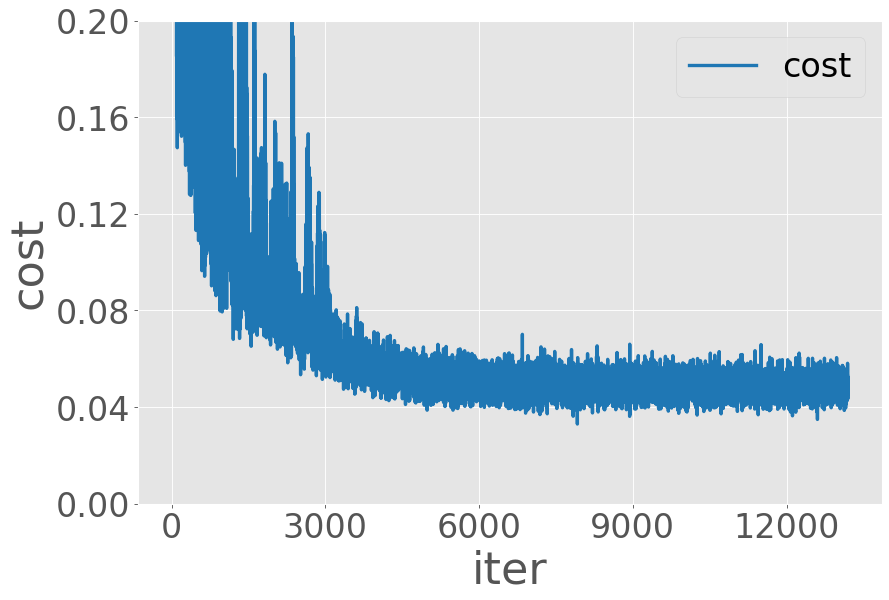

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8), dpi=80)
plt.plot(range(len(cost_list)), cost_list, color='#1f77b4', lw=3, label='cost')

###################################################################################################################
#plot
###################################################################################################################
plt.ylabel('cost',fontsize=40)
plt.xlabel('iter',fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=30,loc='upper right')
plt.style.use('ggplot')
plt.ylim(0,0.2)
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(5,integer=True))
plt.gca().yaxis.set_major_locator(MaxNLocator(6,integer=True))
# plt.savefig(f'./expFuzzy_1.pdf',bbox_inches='tight',dpi=80,pad_inches=0.0)#保存文件在指定文件夹下很方便
plt.show()
plt.close()

In [20]:

x = F.sigmoid(torch.Tensor([-10, 10, 10]))*4-2
x = x.clamp(-1, 0.5)
x

tensor([-1.0000,  0.5000,  0.5000])